# Metrics Comparison: Baseline Model vs Federated Learning

## Training Time

In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
with open("model/training_time_seconds.json", "r") as f:
    training_time = json.load(f)

In [3]:
pd.DataFrame(training_time["baseline"], columns=["training_time_seconds"])

,training_time_seconds
0,2330
1,2365
2,2374
3,2361
4,2365


In [4]:
pd.DataFrame(training_time["fl"], columns=["training_time_seconds"])

,training_time_seconds
0,955
1,969
2,973
3,941
4,979


## Model Metrics

In [5]:
with open("model/fl_results.json", "r") as f:
    fl_metrics = json.load(f)

In [6]:
with open("model/baseline_results.json", "r") as f:
    baseline_metrics = json.load(f)

In [7]:
fl_centralized_metrics = fl_metrics.get("centralized_evaluate", [])
fl_losses = [metric["centralized_loss"] for metric in fl_centralized_metrics][1:]
fl_accuracies = [metric["centralized_accuracy"] for metric in fl_centralized_metrics][1:]
fl_precisions = [metric["centralized_precision"] for metric in fl_centralized_metrics][1:]
fl_recalls = [metric["centralized_recall"] for metric in fl_centralized_metrics][1:]
fl_f1_scores = [metric["centralized_f1_score"] for metric in fl_centralized_metrics][1:]

In [8]:
baseline_test_metrics = baseline_metrics["test"]
baseline_losses = baseline_test_metrics["loss"]
baseline_accuracies = baseline_test_metrics["accuracy"]
baseline_precisions = baseline_test_metrics["precision"]
baseline_recalls = baseline_test_metrics["recall"]
baseline_f1_scores = baseline_test_metrics["f1_score"]

In [9]:
epoch_rng = range(1, len(baseline_test_metrics) + 1)

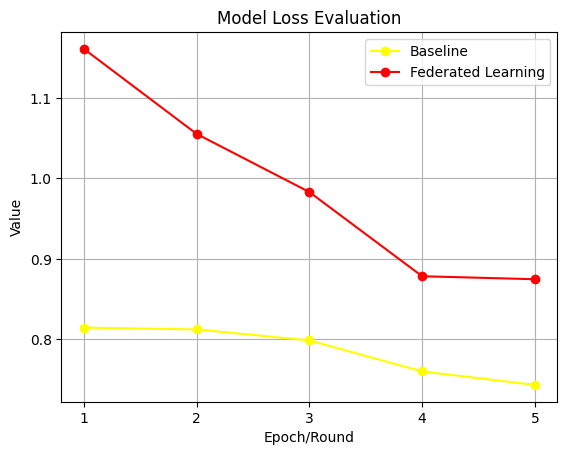

In [10]:
plt.plot(epoch_rng, baseline_losses, label="Baseline", color="yellow", marker="o")
plt.plot(epoch_rng, fl_losses, label="Federated Learning", color="red", marker="o")

plt.xlabel("Epoch/Round")
plt.ylabel("Value")
plt.xticks(epoch_rng)
plt.grid(True)

plt.title("Model Loss Evaluation")
plt.legend()
plt.show()

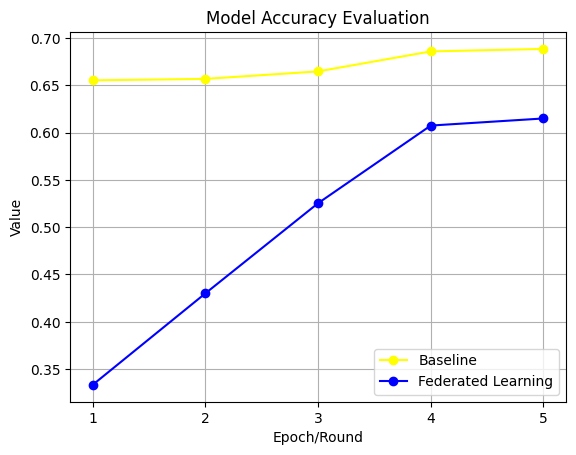

In [11]:
plt.plot(epoch_rng, baseline_accuracies, label="Baseline", color="yellow", marker="o")
plt.plot(epoch_rng, fl_accuracies, label="Federated Learning", color="blue", marker="o")

plt.xlabel("Epoch/Round")
plt.ylabel("Value")
plt.xticks(epoch_rng)
plt.grid(True)

plt.title("Model Accuracy Evaluation")
plt.legend()
plt.show()

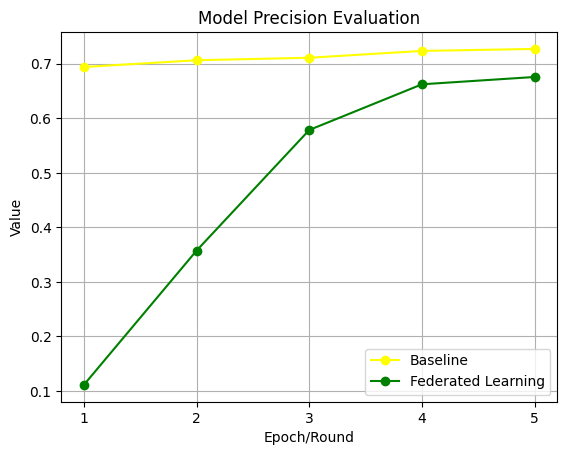

In [12]:
plt.plot(epoch_rng, baseline_precisions, label="Baseline", color="yellow", marker="o")
plt.plot(epoch_rng, fl_precisions, label="Federated Learning", color="green", marker="o")

plt.xlabel("Epoch/Round")
plt.ylabel("Value")
plt.xticks(epoch_rng)
plt.grid(True)

plt.title("Model Precision Evaluation")
plt.legend()
plt.show()

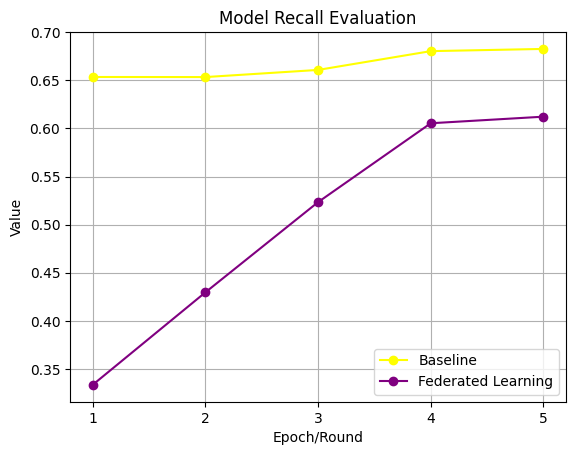

In [13]:
plt.plot(epoch_rng, baseline_recalls, label="Baseline", color="yellow", marker="o")
plt.plot(epoch_rng, fl_recalls, label="Federated Learning", color="purple", marker="o")

plt.xlabel("Epoch/Round")
plt.ylabel("Value")
plt.xticks(epoch_rng)
plt.grid(True)

plt.title("Model Recall Evaluation")
plt.legend()
plt.show()

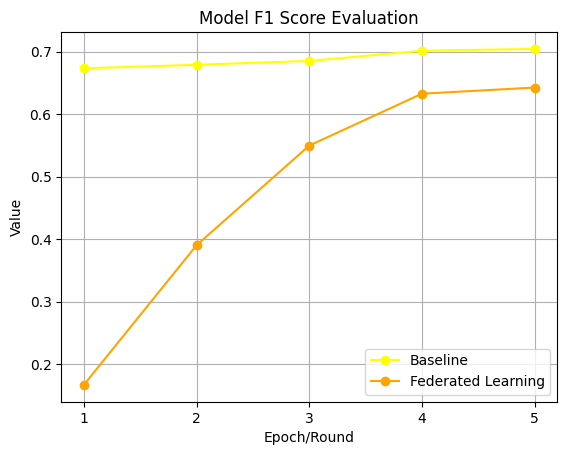

In [14]:
plt.plot(epoch_rng, baseline_f1_scores, label="Baseline", color="yellow", marker="o")
plt.plot(epoch_rng, fl_f1_scores, label="Federated Learning", color="orange", marker="o")

plt.xlabel("Epoch/Round")
plt.ylabel("Value")
plt.xticks(epoch_rng)
plt.grid(True)

plt.title("Model F1 Score Evaluation")
plt.legend()
plt.show()

In [15]:
df_baseline = pd.DataFrame(baseline_test_metrics)
df_fl = pd.DataFrame({
    "loss": fl_losses,
    "accuracy": fl_accuracies,
    "precision": fl_precisions,
    "recall": fl_recalls,
    "f1_score": fl_f1_scores
})

In [16]:
df_baseline

,loss,accuracy,precision,recall,f1_score
0,0.814460,0.655139,0.694067,0.653494,0.673169
1,0.812218,0.656667,0.706455,0.653391,0.678888
2,0.798561,0.664583,0.711029,0.660822,0.685007
3,0.759988,0.685694,0.723554,0.680361,0.701293
4,0.743221,0.688333,0.727214,0.682664,0.704235


In [17]:
df_fl

,loss,accuracy,precision,recall,f1_score
0,1.161097,0.333333,0.111111,0.333333,0.166667
1,1.055380,0.430000,0.357347,0.429490,0.390111
2,0.983081,0.525278,0.578599,0.523336,0.549582
3,0.878392,0.607361,0.662365,0.605386,0.632595
4,0.874677,0.614861,0.675790,0.612219,0.642436


In [18]:
pct_changes = {}

for metric in df_baseline.columns:
    pct_changes[metric] = 100.0 * (df_fl[metric] - df_baseline[metric]) / df_baseline[metric]

In [19]:
df_pct_changes = pd.DataFrame(pct_changes)
df_pct_changes["training_time"] = [100.0 * (training_time["fl"][i] - training_time["baseline"][i]) / training_time["baseline"][i] for i in range(0, 5)]
df_pct_changes

,loss,accuracy,precision,recall,f1_score,training_time
0,42.560366,-49.120204,-83.991288,-48.992100,-75.241491,-59.012876
1,29.938152,-34.517766,-49.416854,-34.267498,-42.536680,-59.027484
2,23.106568,-20.961338,-18.625088,-20.805320,-19.769875,-59.014322
3,15.579740,-11.423942,-8.456630,-11.019934,-9.795886,-60.144007
4,17.687418,-10.673931,-7.071387,-10.319017,-8.775347,-58.604651


## Percentage Change Visualization

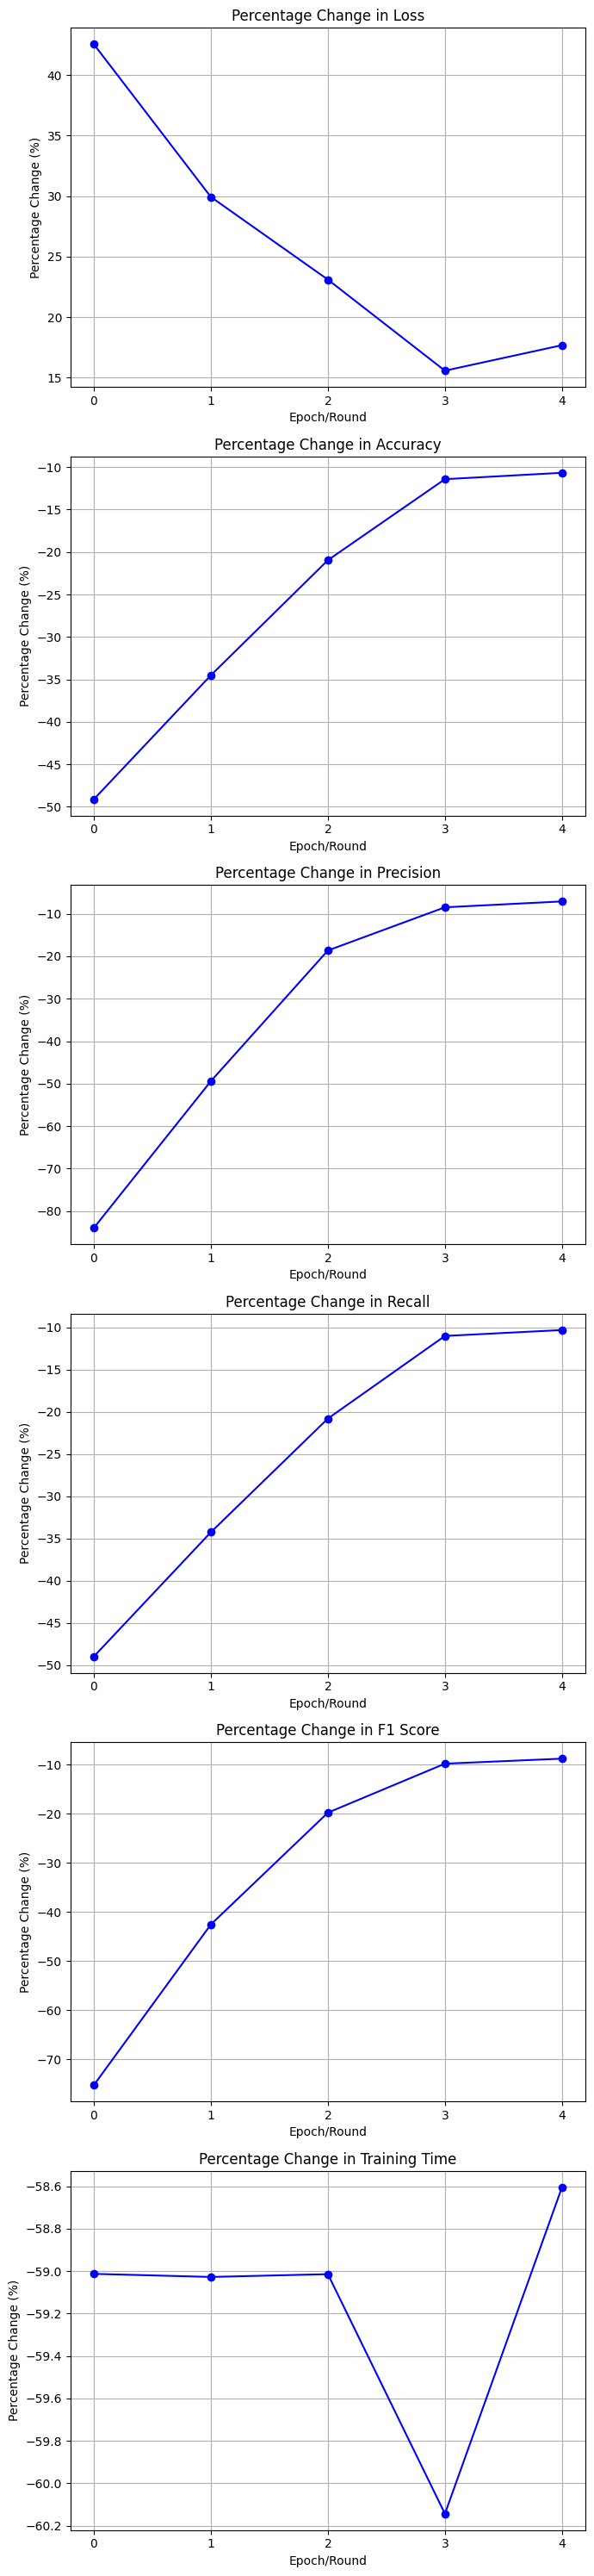

In [20]:
metrics = df_pct_changes.columns
num_metrics = len(metrics)

fig, axes = plt.subplots(num_metrics, 1, figsize=(7, 5 * num_metrics))

for i, metric in enumerate(metrics):
    axes[i].plot(df_pct_changes.index, df_pct_changes[metric], marker="o", color="blue")
    axes[i].set_title(f"Percentage Change in {metric.replace('_', ' ').title()}")
    axes[i].set_xlabel("Epoch/Round")
    axes[i].set_ylabel("Percentage Change (%)")
    axes[i].grid(True)
    axes[i].set_xticks(df_pct_changes.index)

plt.tight_layout()
plt.show()